<a href="https://colab.research.google.com/github/carmsanchezs/DSFem_titanic_project/blob/main/Reto_3_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic**
###**Reto**: ¿Cuál es la supervivencia por genéro, clase y embarque? Acompaña tu respuesta con un gráfico.
[reto y dataset en Kaggle](https://www.kaggle.com/c/titanic/data)

In [239]:
# Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
# Cargando archivo
data = pd.read_csv('train.csv')

#**Explorando nuestro dataset**




In [241]:
# Conociendo la cantidad de pasajeros que sobrevivieron y los que no
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [242]:
# Renombramos las columnas traduciendo a español
data.rename(columns={'PassengerId':'Id Pasajero','Survived':'Supervivencia', 'Pclass':'Clase','Name':'Nombre', 'Sex':'Genero','Age':'Edad','SibSp':'SibSp','Parch':'Parch', 'Ticket':'Tiquete','Fare':'Costo tiquete','Cabin':'Cabina','Embarked':'Embarque'},inplace=True)

In [243]:
# Filtrando sólo los sobrevivientes
sobrevivientes = data[data['Supervivencia']==1]

In [244]:
# Explorando la cantidad de información que hay en el dataset
sobrevivientes.shape

(342, 12)

In [245]:
# Explorando los nombres de las columnas y su tipo de dato
sobrevivientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id Pasajero    342 non-null    int64  
 1   Supervivencia  342 non-null    int64  
 2   Clase          342 non-null    int64  
 3   Nombre         342 non-null    object 
 4   Genero         342 non-null    object 
 5   Edad           290 non-null    float64
 6   SibSp          342 non-null    int64  
 7   Parch          342 non-null    int64  
 8   Tiquete        342 non-null    object 
 9   Costo tiquete  342 non-null    float64
 10  Cabina         136 non-null    object 
 11  Embarque       340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB



> **Conclusiones sobre el análisis de los campos.**
>*   Total de sobrevivientes
: **342**
*   Tenemos los siguientes campos numéricos: **Age, Fare, SibSp, Parch**
*   Y las siguientes variables categóricas: **Survived:** 0=No, 1=Yes; **Pclass:** 1 = 1st, 2 = 2nd, 3 = 3rd; **Sex:** male, female; **Embarked:** C = Cherbourg, Q = Queenstown, S = Southampton











#**Supervivencia por genéro**

In [246]:
# Verificamos que en el campo "Sex" no tengamos valores atípicos.
sobrevivientes['Genero'].unique()

array(['female', 'male'], dtype=object)

In [247]:
# Personas iniciales
sobrevivientes['Genero'].value_counts()

female    233
male      109
Name: Genero, dtype: int64

In [248]:
# Obtenemos el total de pasajeros y lo guardamos en una variable
total_sobrevivientes = len(data_titanic['Nombre'])
total_sobrevivientes

342

In [249]:
# Creamos un nuevo campo que será la tasa de supervivencia por genero
sobrevivientes_sex = sobrevivientes.groupby('Genero')[['Nombre']].count()
sobrevivientes_sex['% tasa_mortalidad_gen']= round((sobrevivientes_sex['Nombre']*100/total_sobrevivientes),2)

In [250]:
# Adecuamos nuestro dataset para graficar
del(sobrevivientes_sex['Nombre'])
sobrevivientes_sex.reset_index(inplace=True)
sobrevivientes_sex.head()

,Genero,% tasa_mortalidad_gen
0,female,68.13
1,male,31.87


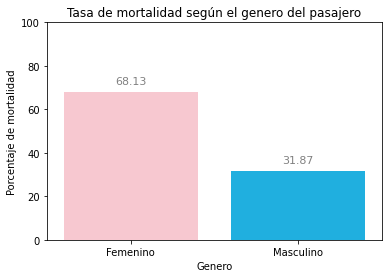

In [251]:
# Graficamos
colors_gen = {"female": "#FFC0CB",
                  "male": "#00BFFF"}
g=sns.barplot(x="Genero", y="% tasa_mortalidad_gen", data=sobrevivientes_sex, palette=colors_gen)
g.set_title('Tasa de mortalidad según el genero del pasajero')
g.set_ylabel('Porcentaje de mortalidad')
g.set_xticklabels(['Femenino', 'Masculino'])

# creando anotaciones en la gráfica
for p in g.patches:
             g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
# ajustamos el valor de y a 100             
_ = g.set_ylim(0,100) 

plt.show()

#**Supervivencia por clase**

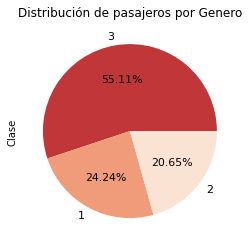

In [264]:
ax = data.Clase.value_counts().plot.pie(autopct='%1.2f%%',shadow=False,
                                legend = False, fontsize=11)
ax.set_title('Distribución de pasajeros por Genero')
plt.show()

In [253]:
# Verificamos que no existan valores atípicos
sobrevivientes['Clase'].value_counts()

1    136
3    119
2     87
Name: Clase, dtype: int64

In [254]:
# Obtenemos el total de pasajeros que sobrevivieron o no ("Survived"), de acuerdo a la clase "Pclass"
sobrevivientes_class = sobrevivientes.groupby('Clase')[['Nombre']].count()

In [255]:
# Obtenemos tasa de mortalidad por clase 
sobrevivientes_class['% tasa_mortalidad_clase']= round((sobrevivientes_class['Nombre']*100/total_personas),2)
del(sobrevivientes_class['Nombre'])
sobrevivientes_class.reset_index(inplace=True)
sobrevivientes_class

,Clase,% tasa_mortalidad_clase
0,1,39.77
1,2,25.44
2,3,34.80


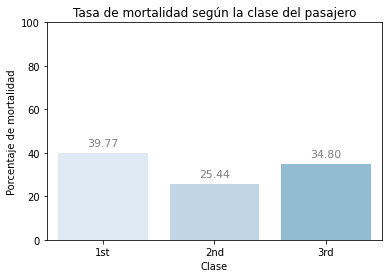

In [256]:
# graficamos
sns.set_palette("Blues")
g = sns.barplot(x="Clase", y="% tasa_mortalidad_clase", data=sobrevivientes_class)
g.set_title('Tasa de mortalidad según la clase del pasajero')
g.set_ylabel('Porcentaje de mortalidad')
g.set_xticklabels(['1st','2nd','3rd'])

# creando las anotaciones para desplegar los valores en cada bar
for p in g.patches:
             g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
# ajustamos el valor de y a 100             
_ = g.set_ylim(0,100) 

plt.show()

#**Supervivencia por Embarque**

In [257]:
# verificamos que no existan valores atípicos
sobrevivientes['Embarque'].value_counts()

S    217
C     93
Q     30
Name: Embarque, dtype: int64

In [258]:
# Buscando valores nulos en el campo "Embarked"
sobrevivientes[sobrevivientes['Embarque'].isnull()]

,Id Pasajero,Supervivencia,Clase,Nombre,Genero,Edad,SibSp,Parch,Tiquete,Costo tiquete,Cabina,Embarque
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [259]:
# Vamos a trabajar con valores no nulos en 'Embarked' y determinar el total
sobrevivientes_embarked_notnull= sobrevivientes[sobrevivientes['Embarque'].notnull()]
total_sobrevivientes_embarked = len(sobrevivientes_embarked_notnull)
total_sobrevivientes_embarked

340

In [260]:
# Obtenemos el total de pasajeros sobrevivientes y no sobrevivientes en cada una de las dependencias de embarque
sobrevivientes_embarked= sobrevivientes_embarked_notnull.groupby('Embarque')[['Nombre']].count()

In [261]:
# Creamos un nuevo campo que será la tasa de supervivencia por dependecia de embarque
sobrevivientes_embarked['% tasa_mortalidad_embarque']= round((sobrevivientes_embarked['Nombre']*100/total_sobrevivientes_embarked),2)
del(sobrevivientes_embarked['Nombre'])
sobrevivientes_embarked.reset_index(inplace=True)
sobrevivientes_embarked

,Embarque,% tasa_mortalidad_embarque
0,C,27.35
1,Q,8.82
2,S,63.82


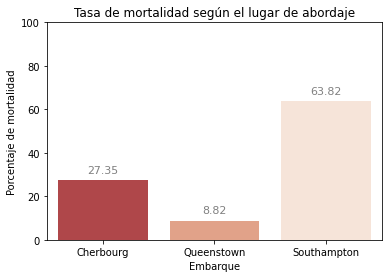

In [262]:
# graficamos
sns.set_palette("RdBu")
g= sns.barplot(x="Embarque", y="% tasa_mortalidad_embarque", data=sobrevivientes_embarked)
g.set_title('Tasa de mortalidad según el lugar de abordaje')
g.set_ylabel('Porcentaje de mortalidad')
g.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])

# creando anotaciones en cada bar
for p in g.patches:
             g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
# ajustamos el valor de y a 60             
_ = g.set_ylim(0,100) 

plt.show()

#**Resumen gráficas**

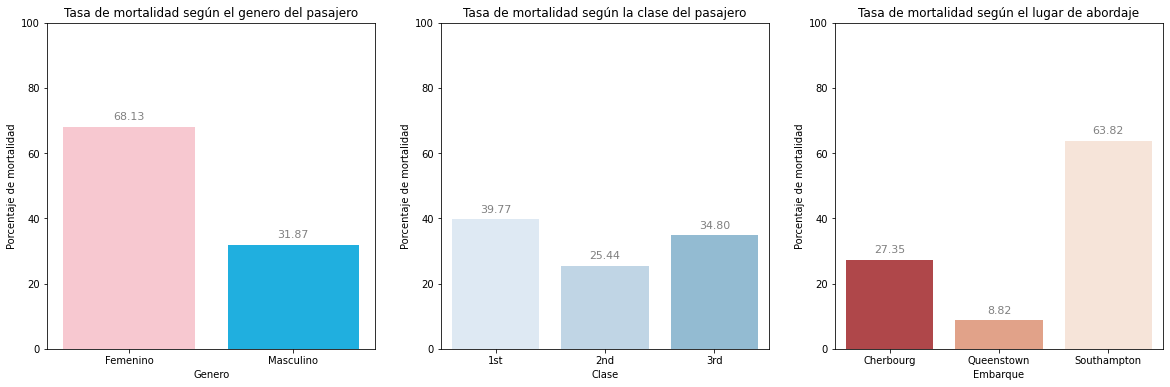

In [263]:
#Conjunto de gráficas 
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(20,6))
ax1=sns.barplot(x="Genero",y="% tasa_mortalidad_gen", data=sobrevivientes_sex, palette=colors_gen, ax=ax1)
ax1.set_title('Tasa de mortalidad según el genero del pasajero')
ax1.set_ylabel('Porcentaje de mortalidad')
ax1.set_xticklabels(['Femenino', 'Masculino'])
for p in ax1.patches:
             ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
_ = ax1.set_ylim(0,100) 

sns.set_palette("Blues")
ax2 = sns.barplot(x="Clase", y="% tasa_mortalidad_clase", data=sobrevivientes_class, ax= ax2)
ax2.set_title('Tasa de mortalidad según la clase del pasajero')
ax2.set_ylabel('Porcentaje de mortalidad')
ax2.set_xticklabels(['1st', '2nd', '3rd'])
for p in ax2.patches:
             ax2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
_ = ax2.set_ylim(0,100) 

sns.set_palette("RdBu")
ax3= sns.barplot(x="Embarque", y="% tasa_mortalidad_embarque", data=sobrevivientes_embarked, ax=ax3)
ax3.set_title('Tasa de mortalidad según el lugar de abordaje')
ax3.set_ylabel('Porcentaje de mortalidad')
ax3.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
for p in ax3.patches:
             ax3.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
_ = ax3.set_ylim(0,100) 

plt.show()

#**Conclusiones**




##**Tasa de mortalidad según el genero del pasajero**
* Vemos que del total de sobrevivientes hubo una mayor cantidad de mujeres 68.13% contra 31.87% de hombres.

##**Tasa de mortalidad según la clase del pasajero**
* Del total de sobrevivientes observamos que el mayor porcentaje es para la Primer Clase 39.77%, seguido de la Tercera Clase con 34.80% y por último la Segunda Clase con 25.44%. 
* Sin embargo, de nuestra gráfica "Distribución de pasajeros por Genero", vemos que más de la mitad de pasajeros 55.11% pertenecían a la Tercer Clase contra tan solo ese 34.80% de sobrevivientes. 

##**Tasa de mortalidad según el lugar de abordaje**
* Sobrevivieron una mayor cantidad de pasajeros con abordaje "Southampton" con 63.82%, seguido de pasajeron con abordaje "Cherbourg con 27.35% y finalmente los de abordaje tipo "Cherbourg"